**Big Sales Prediction using Random Forest Regressor**

-------------

## **Objective**

**There are 12 variable dataset**


1.  Item_Identifier
2.  Item_Weight
3.  Item_Fat_Content
4.  Item_Visibility
5.  Item_Type
6.  Item_MRP
7.  Outlet_Identifier
8.  Outlet_Establishment_Year
1.  Outlet_Size
2.  Outlet_Location_Type
1.  Outlet_Type
2.  Item_Outlet_Sales






## **Data Source**

It is taken from YBI FOUNDATION dataset repository.

## **Import Library**

In [1]:
import pandas as pd
import numpy as np

## **Import Data**

In [2]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Big%20Sales%20Data.csv')

## **Describe Data**

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


#**Clean Missing Value**

In [63]:
df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('mean'),inplace=True)

In [64]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,4,1999,0,0,1,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,7,2007,0,1,1,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,6,2009,0,2,2,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,9,1985,1,0,0,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,7,2007,0,1,1,352.874000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.3+ MB


In [66]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.789050,0.353351,0.065953,0.208814,141.004977,4.128415,1997.830681,0.607927,1.112856,1.201281,2185.836320
std,4.246305,0.478027,0.051459,0.452384,62.086938,2.717103,8.371664,0.676058,0.812755,0.796543,1827.479550
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.300000,0.000000,0.027036,0.000000,94.012000,2.000000,1987.000000,0.000000,0.000000,1.000000,922.135101
50%,12.660298,0.000000,0.054021,0.000000,142.247000,4.000000,1999.000000,0.000000,1.000000,1.000000,1768.287680
75%,16.000000,1.000000,0.094037,0.000000,185.855600,6.000000,2004.000000,1.000000,2.000000,1.000000,2988.110400
max,30.000000,1.000000,0.328391,2.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,31224.726950


## **Data Visualization**

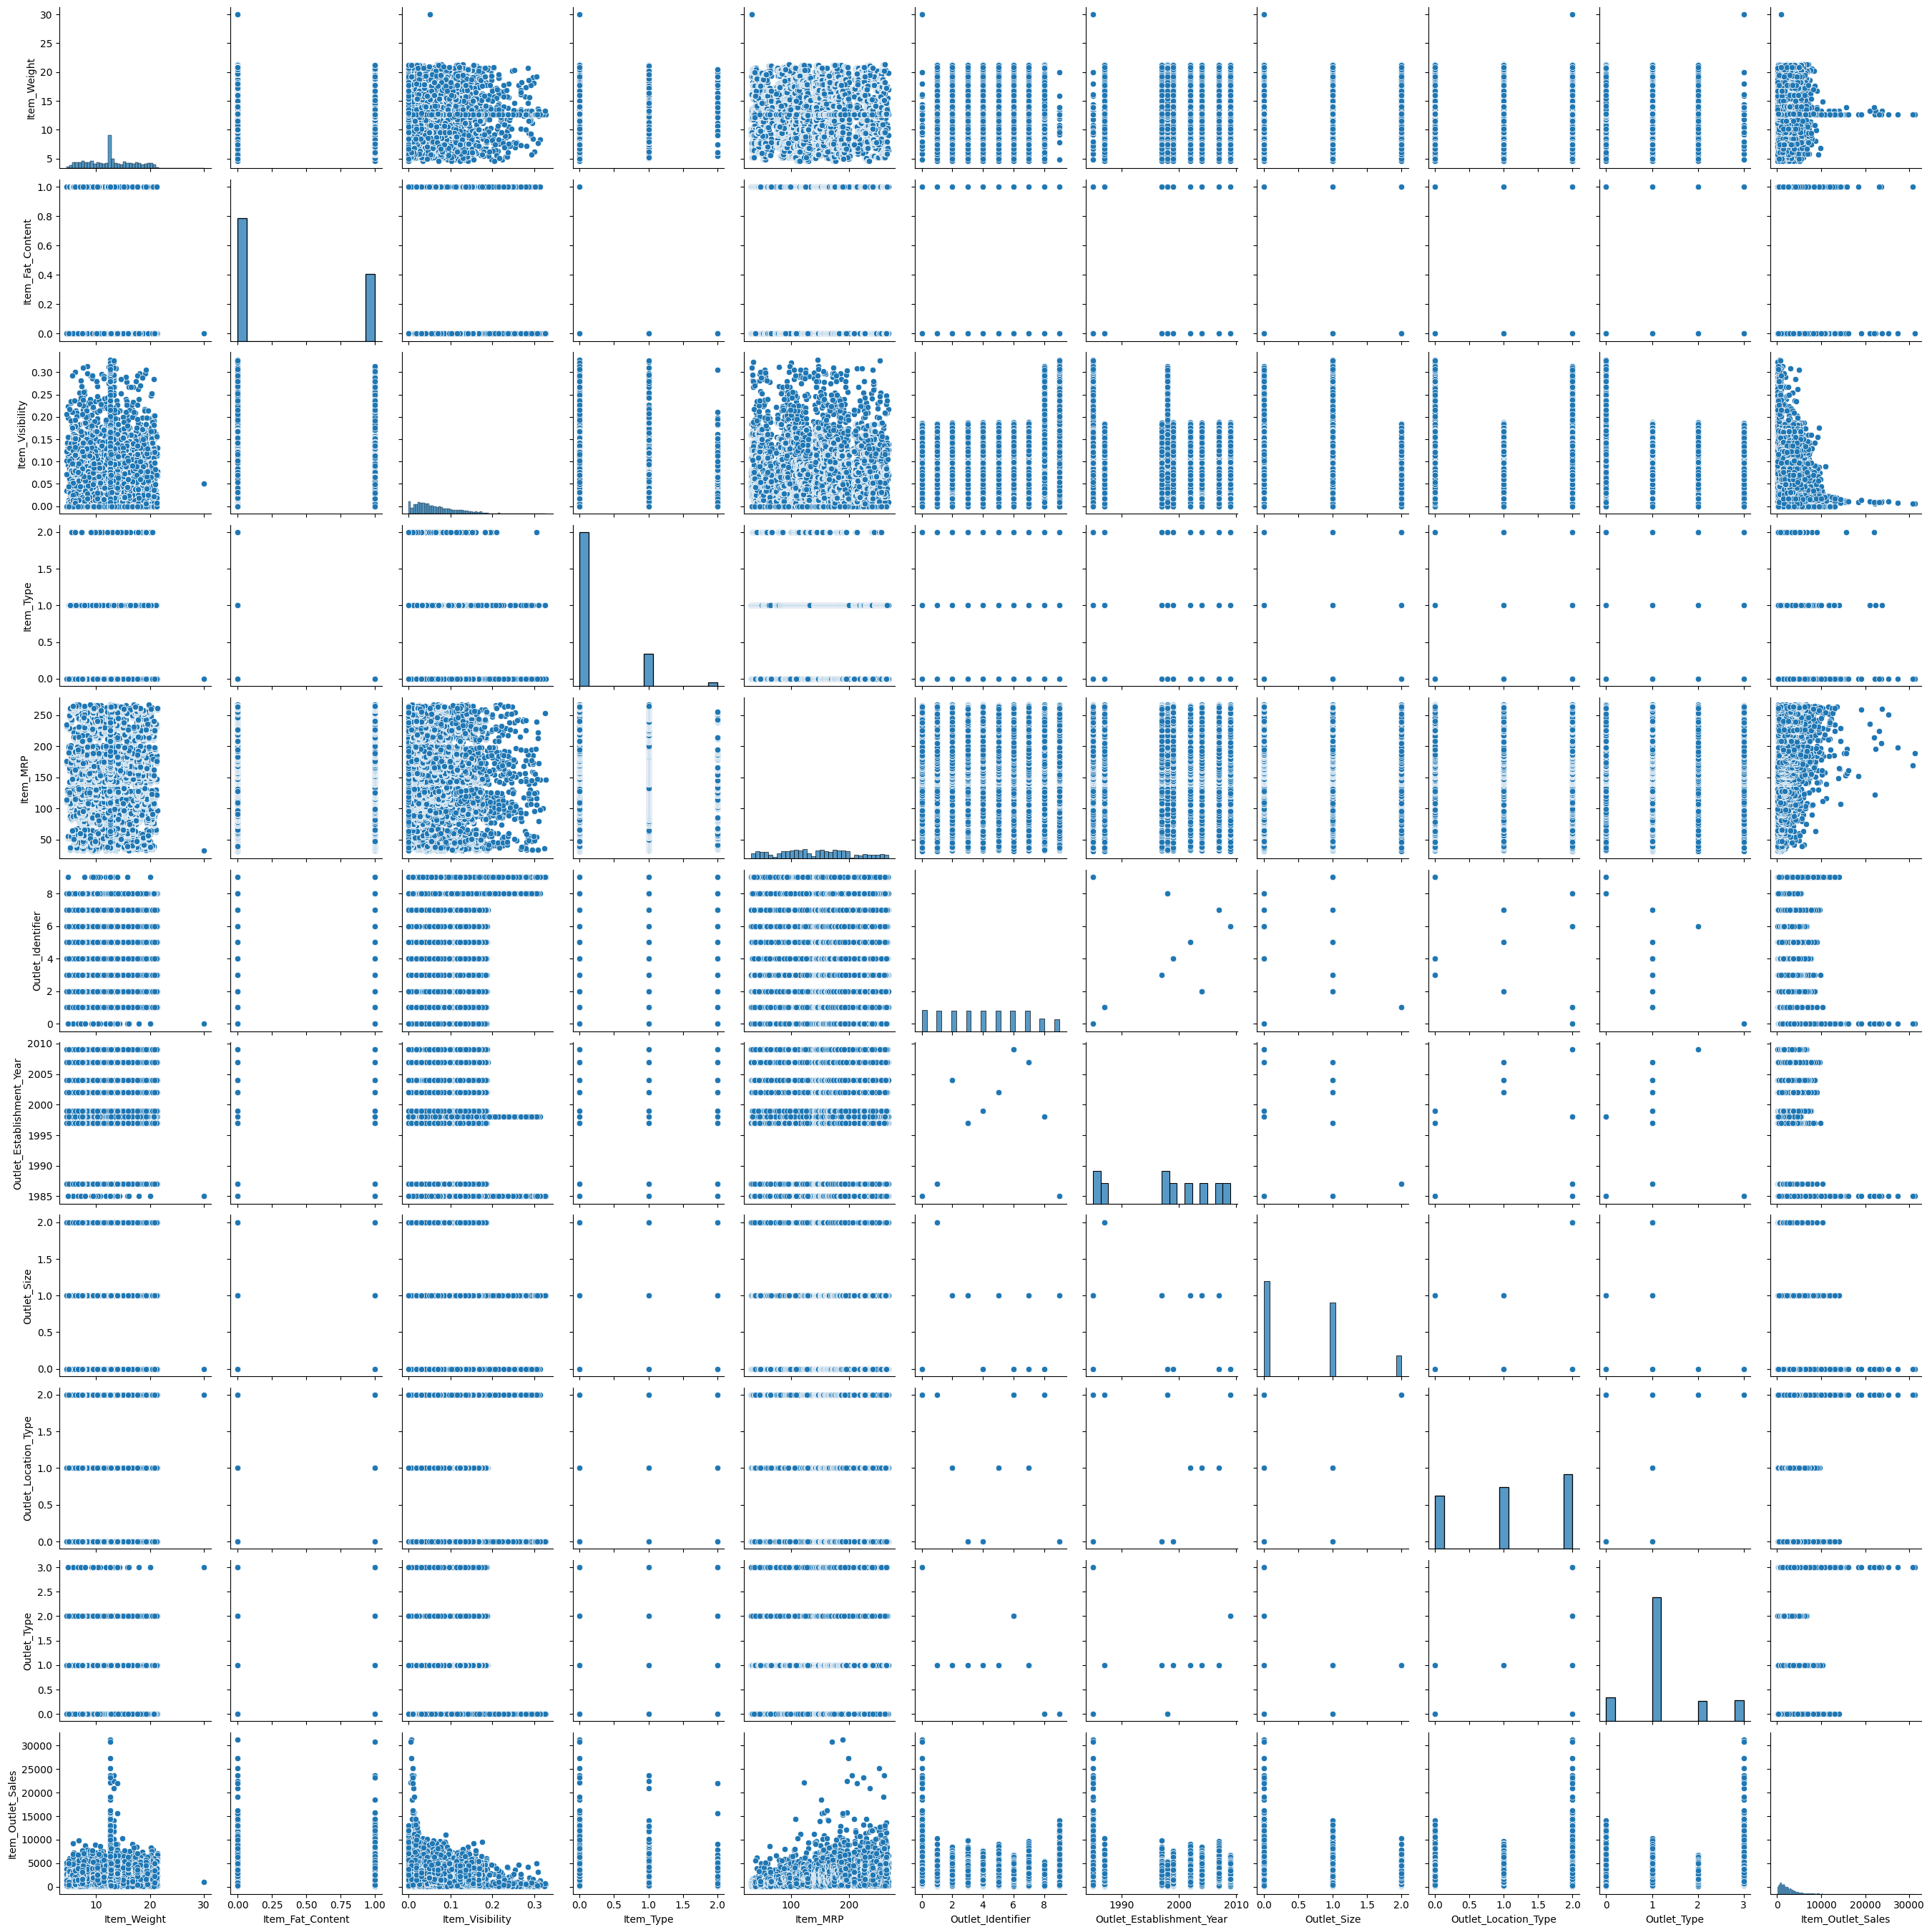

In [68]:
import seaborn as sns
sns.pairplot(df)

In [69]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## **Data Preprocessing**

In [70]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
0                   9185
1                   5019
Name: count, dtype: int64

In [71]:
df.replace({'Item_Fat_Content':{'LF':'Low Fat','reg':'Regular', 'low fat':'Low Fat'}},inplace=True)

In [72]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
0                   9185
1                   5019
Name: count, dtype: int64

In [73]:
df.replace({'Item_Fat_Content':{'Low Fat':0,'Regular':1}},inplace=True)

In [74]:
df[['Item_Type']].value_counts()

Item_Type
0            11518
1             2406
2              280
Name: count, dtype: int64

In [75]:
df.replace({'Item_Type':{'Fruits and Vegetables': 0, 'Snack Foods':0, 'Household':1, 'Frozen Foods':0,'Dairy':0,'Baking Goods':0,'Canned':0, 'Health and Hygiene':1, 'Meat':0, 'Soft Drinks':0,'Breads':0, 'Hard Drinks':0,'Others':2, 'Starchy Foods':0, 'Breakfast': 0, 'Seafood':0}},inplace=True)

In [76]:
df[['Item_Type']].value_counts()

Item_Type
0            11518
1             2406
2              280
Name: count, dtype: int64

In [77]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
0                    1559
1                    1553
2                    1550
3                    1550
4                    1550
5                    1548
6                    1546
7                    1543
8                     925
9                     880
Name: count, dtype: int64

In [78]:
df.replace({'Outlet_Identifier':{'OUT027':0, 'OUT013':1, 'OUT035':2, 'OUT046':3, 'OUT049':4, 'OUT045':5, 'OUT018':6,'OUT017':7, 'OUT010':8, 'OUT019':9}},inplace=True)

In [79]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
0                    1559
1                    1553
2                    1550
3                    1550
4                    1550
5                    1548
6                    1546
7                    1543
8                     925
9                     880
Name: count, dtype: int64

In [80]:
df[['Outlet_Size']].value_counts()

Outlet_Size
0              7122
1              5529
2              1553
Name: count, dtype: int64

In [81]:
df.replace({'Outlet_Size':{'Medium':0,'Small':1,'High':2}},inplace=True)

In [82]:
df[['Outlet_Size']].value_counts()

Outlet_Size
0              7122
1              5529
2              1553
Name: count, dtype: int64

In [83]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
2                       5583
1                       4641
0                       3980
Name: count, dtype: int64

In [84]:
df.replace({'Outlet_Location_Type':{'Tier 1':0,'Tier 2':1,'Tier 3':2}},inplace=True)

In [85]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
2                       5583
1                       4641
0                       3980
Name: count, dtype: int64

In [86]:
df[['Outlet_Type']].value_counts()

Outlet_Type
1              9294
0              1805
3              1559
2              1546
Name: count, dtype: int64

In [87]:
df.replace({'Outlet_Type':{'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3}},inplace=True)

In [88]:
df[['Outlet_Type']].value_counts()

Outlet_Type
1              9294
0              1805
3              1559
2              1546
Name: count, dtype: int64

In [89]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,4,1999,0,0,1,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,7,2007,0,1,1,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,6,2009,0,2,2,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,9,1985,1,0,0,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,7,2007,0,1,1,352.874000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.3+ MB


In [91]:
df.shape

(14204, 12)

## **Define Target Variable (y) and Feature Variables (X)**

In [92]:
y=df['Item_Outlet_Sales']

In [93]:
y.shape

(14204,)

In [94]:
y

0         436.608721
1         443.127721
2         564.598400
3        1719.370000
4         352.874000
            ...     
14199    4984.178800
14200    2885.577200
14201    2885.577200
14202    3803.676434
14203    3644.354765
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [95]:
X=df[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]

In [96]:
X=df.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)

In [97]:
X.shape

(14204, 10)

In [98]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.300000,0,0.111448,0,33.4874,4,1999,0,0,1
1,12.300000,0,0.111904,0,33.9874,7,2007,0,1,1
2,12.300000,0,0.111728,0,33.9874,6,2009,0,2,2
3,12.300000,0,0.000000,0,34.3874,9,1985,1,0,0
4,9.800000,1,0.045523,0,35.0874,7,2007,0,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,12.800000,0,0.069606,0,261.9252,2,2004,1,1,1
14200,12.800000,0,0.070013,0,262.8252,7,2007,0,1,1
14201,12.800000,0,0.069561,0,263.0252,1,1987,2,2,1
14202,12.660298,0,0.069282,0,263.5252,0,1985,0,2,3


#**Get X varible standarized**

In [99]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_std=df[['Item_Weight','Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
X_std=sc.fit_transform(X_std)
X_std

array([[-0.11517473,  0.88413635, -1.73178716,  0.13968068],
       [-0.11517473,  0.89300616, -1.72373366,  1.09531886],
       [-0.11517473,  0.88958331, -1.72373366,  1.3342284 ],
       ...,
       [ 0.00257884,  0.07011952,  1.96538148, -1.29377659],
       [-0.03032192,  0.06469366,  1.97343499, -1.53268614],
       [ 0.00257884,  0.07334891,  1.97504569,  0.13968068]])

In [100]:
X[['Item_Weight','Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']] = pd.DataFrame(X_std, columns =[['Item_Weight','Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']])

In [101]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.115175,0,0.884136,0,-1.731787,4,0.139681,0,0,1
1,-0.115175,0,0.893006,0,-1.723734,7,1.095319,0,1,1
2,-0.115175,0,0.889583,0,-1.723734,6,1.334228,0,2,2
3,-0.115175,0,-1.281712,0,-1.717291,9,-1.532686,1,0,0
4,-0.703943,1,-0.397031,0,-1.706016,7,1.095319,0,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,0.002579,0,0.070990,0,1.947664,2,0.736955,1,1,1
14200,0.002579,0,0.078898,0,1.962160,7,1.095319,0,1,1
14201,0.002579,0,0.070120,0,1.965381,1,-1.293777,2,2,1
14202,-0.030322,0,0.064694,0,1.973435,0,-1.532686,0,2,3


## **Train Test Split**

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.1, random_state=2529)


In [103]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1420, 10), (12784, 10), (1420,), (12784,))

## **Modeling**

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
rfr=RandomForestRegressor(random_state=2529)

In [106]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=2529)

## **Prediction**

In [107]:
y_pred = rfr.predict(X_test)

In [108]:
y_pred.shape

(12784,)

In [109]:
y_pred

array([1254.30370516,  954.7840336 , 1701.62035492, ...,  660.97976914,
       1946.70924169, 3030.15010999])

## **Model Evaluation**

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_absolute_error(y_test,y_pred)


844.0863840584999

In [111]:
mean_squared_error(y_test,y_pred)

1874905.546575831

In [112]:

r2_score(y_test,y_pred)

0.444960220046133

## **Get Visualization of Actual vs Predicated Result**

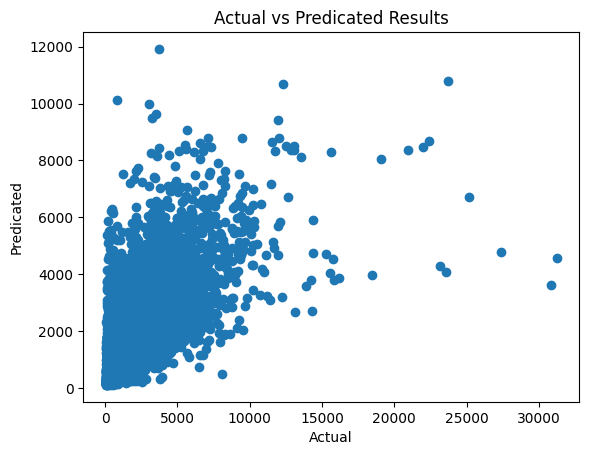

In [113]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicated")
plt.title("Actual vs Predicated Results")
plt.show()